In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox




In [17]:
# Data Generation
# Generate synthetic data for computer programmers' work in the Philippines
np.random.seed(42)
num_samples = 1000

experience_years = np.random.randint(1, 15, num_samples)
education_level = np.random.randint(1, 5, num_samples)
age = np.random.randint(22, 60, num_samples)
gender = np.random.choice(['Male', 'Female'], size=num_samples)
language_proficiency = np.random.uniform(1, 5, num_samples)  # On a scale from 1 to 5
team_size = np.random.randint(1, 20, num_samples)
project_completion_rate = np.random.uniform(0.5, 1, num_samples)  # Percentage of projects completed successfully
salary = (
    3000 + 500 * experience_years +
    1000 * education_level + 200 * age +
    300 * (gender == 'Female') + 500 * language_proficiency +
    50 * team_size + 1000 * project_completion_rate +
    np.random.normal(0, 2000, num_samples)
)

programmer_data = pd.DataFrame({
    'ExperienceYears': experience_years,
    'EducationLevel': education_level,
    'Age': age,
    'Gender': gender,
    'LanguageProficiency': language_proficiency,
    'TeamSize': team_size,
    'ProjectCompletionRate': project_completion_rate,
    'Salary': salary
})

<Figure size 1800x1000 with 0 Axes>

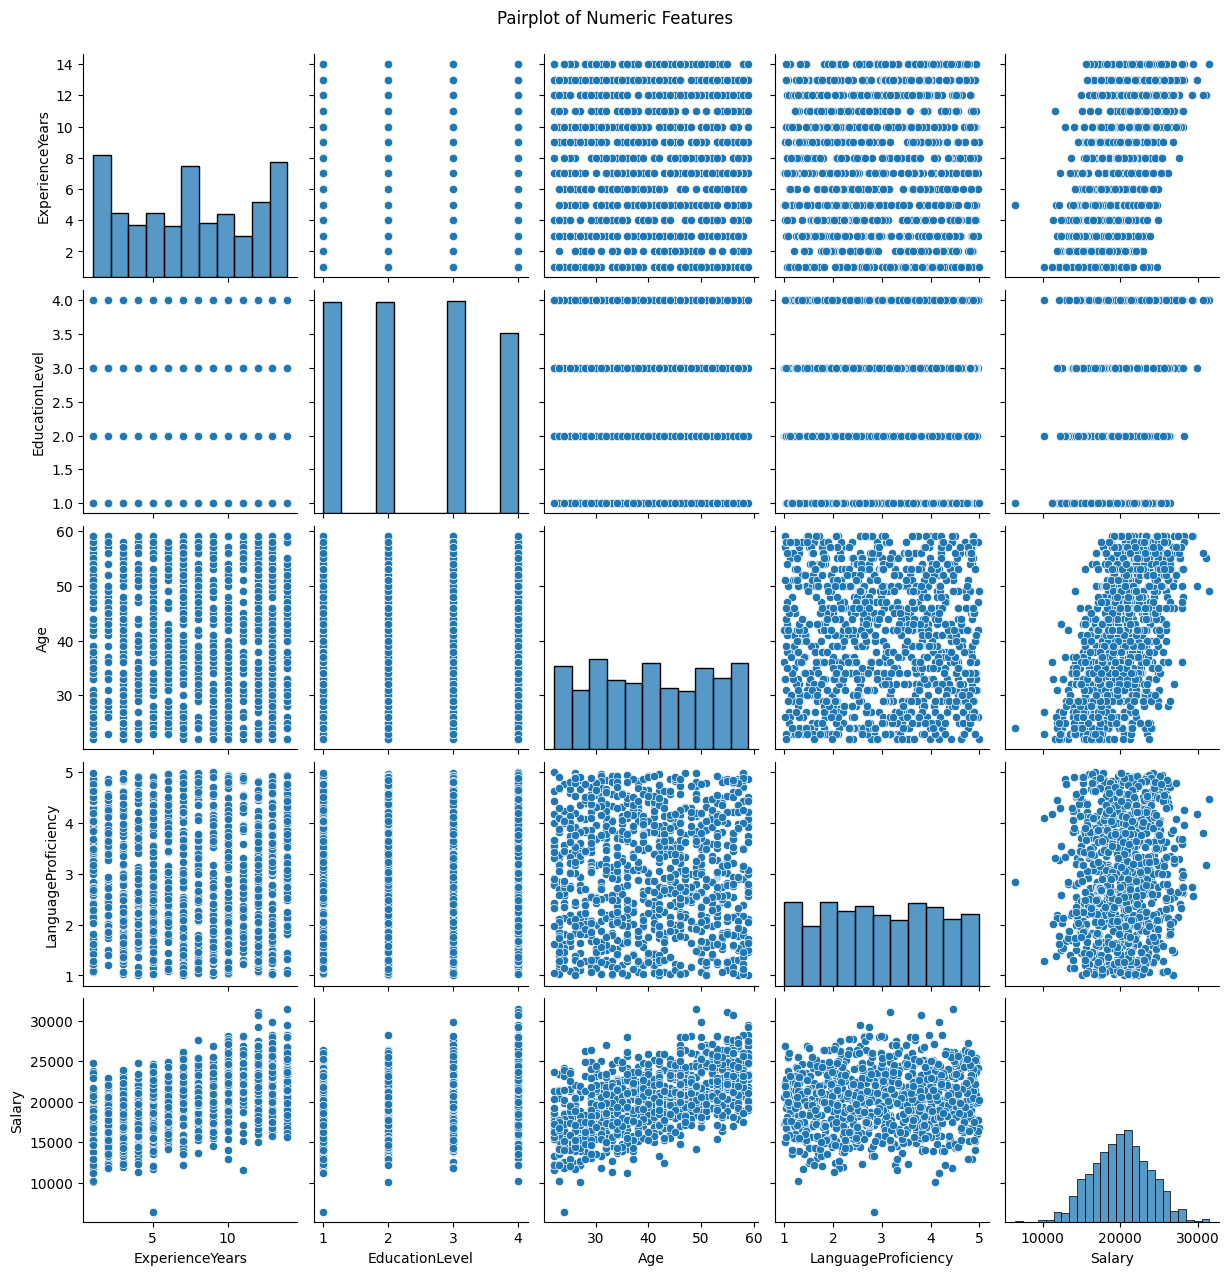

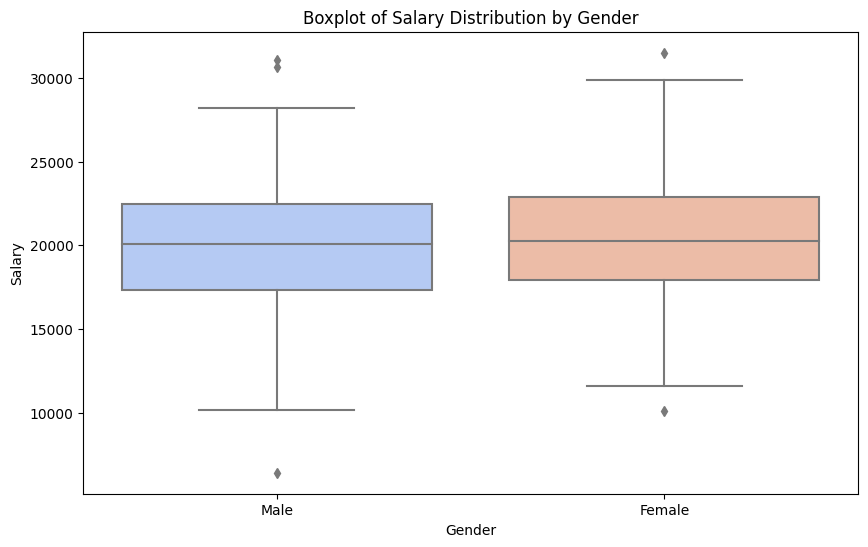

       ExperienceYears  EducationLevel          Age  LanguageProficiency  \
count      1000.000000     1000.000000  1000.000000          1000.000000   
mean          7.443000        2.444000    40.497000             2.979366   
std           4.113596        1.099123    10.938905             1.152622   
min           1.000000        1.000000    22.000000             1.000047   
25%           4.000000        1.000000    31.000000             2.003147   
50%           7.000000        2.000000    41.000000             2.973357   
75%          11.000000        3.000000    50.000000             3.964608   
max          14.000000        4.000000    59.000000             4.991283   

          TeamSize  ProjectCompletionRate        Salary  
count  1000.000000            1000.000000   1000.000000  
mean     10.397000               0.743723  20137.512425  
std       5.301651               0.142139   3668.383734  
min       1.000000               0.500465   6421.341246  
25%       6.000000       

In [18]:
# Exploratory Data Analysis (EDA)
# Explore and visualize the generated data
plt.figure(figsize=(18, 10))

# Pairplot to visualize relationships between numeric features
sns.pairplot(programmer_data[['ExperienceYears', 'EducationLevel', 'Age', 'LanguageProficiency', 'Salary']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Boxplot to visualize the distribution of salaries based on gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=programmer_data, palette='coolwarm')
plt.title('Boxplot of Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Display summary statistics
print(programmer_data.describe())

In [19]:
# Modeling
# Choose a more sophisticated model for salary prediction
X = programmer_data[['ExperienceYears', 'EducationLevel', 'Age', 'LanguageProficiency', 'TeamSize', 'ProjectCompletionRate', 'Gender']]
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # Convert gender to dummy variable
y = programmer_data['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
# Simulation
# Use the trained model to simulate salary predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Print the columns of the DataFrame
print(programmer_data.columns)


Index(['ExperienceYears', 'EducationLevel', 'Age', 'Gender',
       'LanguageProficiency', 'TeamSize', 'ProjectCompletionRate', 'Salary'],
      dtype='object')


Mean Squared Error: 3996693.051613933


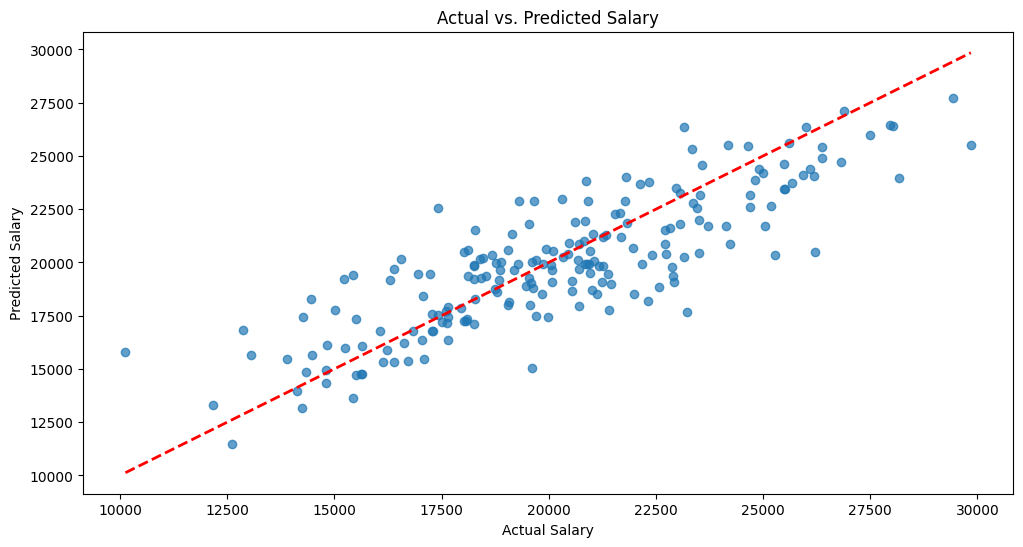

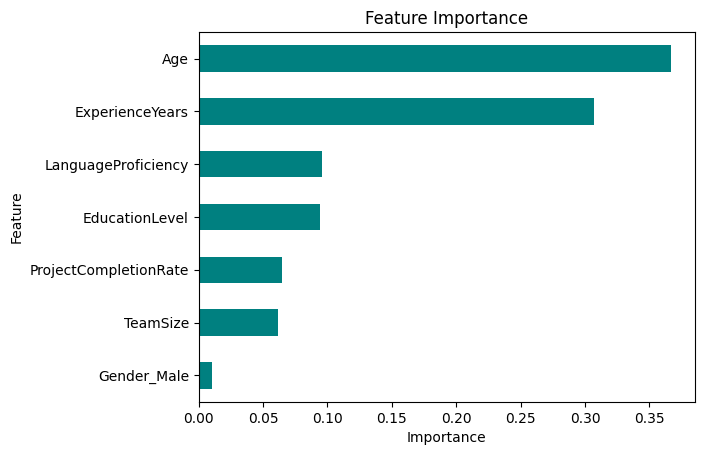

In [22]:
# Evaluation and Analysis
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predicted vs. actual salary
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

# Display feature importances from the Random Forest model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
# UI code starts here

class SalaryPredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Salary Prediction UI")

        # Create and place input widgets
        labels = ['Experience Years', 'Education Level', 'Age', 'Language Proficiency', 'Team Size', 'Project Completion Rate']
        self.entries = {}

        for i, label in enumerate(labels):
            ttk.Label(self.master, text=label).grid(row=i, column=0, pady=5)
            self.entries[label] = ttk.Entry(self.master)
            self.entries[label].grid(row=i, column=1, pady=5)

        # Gender dropdown
        ttk.Label(self.master, text="Gender").grid(row=len(labels), column=0, pady=5)
        self.gender_var = tk.StringVar()
        gender_dropdown = ttk.Combobox(self.master, textvariable=self.gender_var, values=['Male', 'Female'])
        gender_dropdown.grid(row=len(labels), column=1, pady=5)
        gender_dropdown.set('Male')

        # Create a button to trigger the prediction
        predict_button = ttk.Button(self.master, text="Predict Salary", command=self.predict_salary)
        predict_button.grid(row=len(labels) + 1, column=0, columnspan=2, pady=10)

    def predict_salary(self):
        # Extract input values from the UI
        experience_years = int(self.entries['Experience Years'].get())
        education_level = int(self.entries['Education Level'].get())
        age = int(self.entries['Age'].get())
        language_proficiency = float(self.entries['Language Proficiency'].get())
        team_size = int(self.entries['Team Size'].get())
        project_completion_rate = float(self.entries['Project Completion Rate'].get())
        gender = self.gender_var.get()

        # Prepare the input data for prediction
        input_data = pd.DataFrame({
            'ExperienceYears': [experience_years],
            'EducationLevel': [education_level],
            'Age': [age],
            'Gender': [gender],
            'LanguageProficiency': [language_proficiency],
            'TeamSize': [team_size],
            'ProjectCompletionRate': [project_completion_rate]
        })

        # Convert gender to dummy variable
        input_data = pd.get_dummies(input_data, columns=['Gender'], drop_first=True)

        # Make sure that the input data has the same columns as during model training
        missing_cols = set(X.columns) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0

        try:
            # Use the trained model to make a prediction
            predicted_salary = model.predict(input_data)[0]

            # Display the predicted salary
            messagebox.showinfo("Salary Prediction", f"Predicted Salary: ${predicted_salary:.2f}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")


if __name__ == "__main__":
    root = tk.Tk()
    app = SalaryPredictionApp(root)
    root.mainloop()
